## Housing Price Prediction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283152,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.698473,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAAECC7E48>,
      dtype=object)

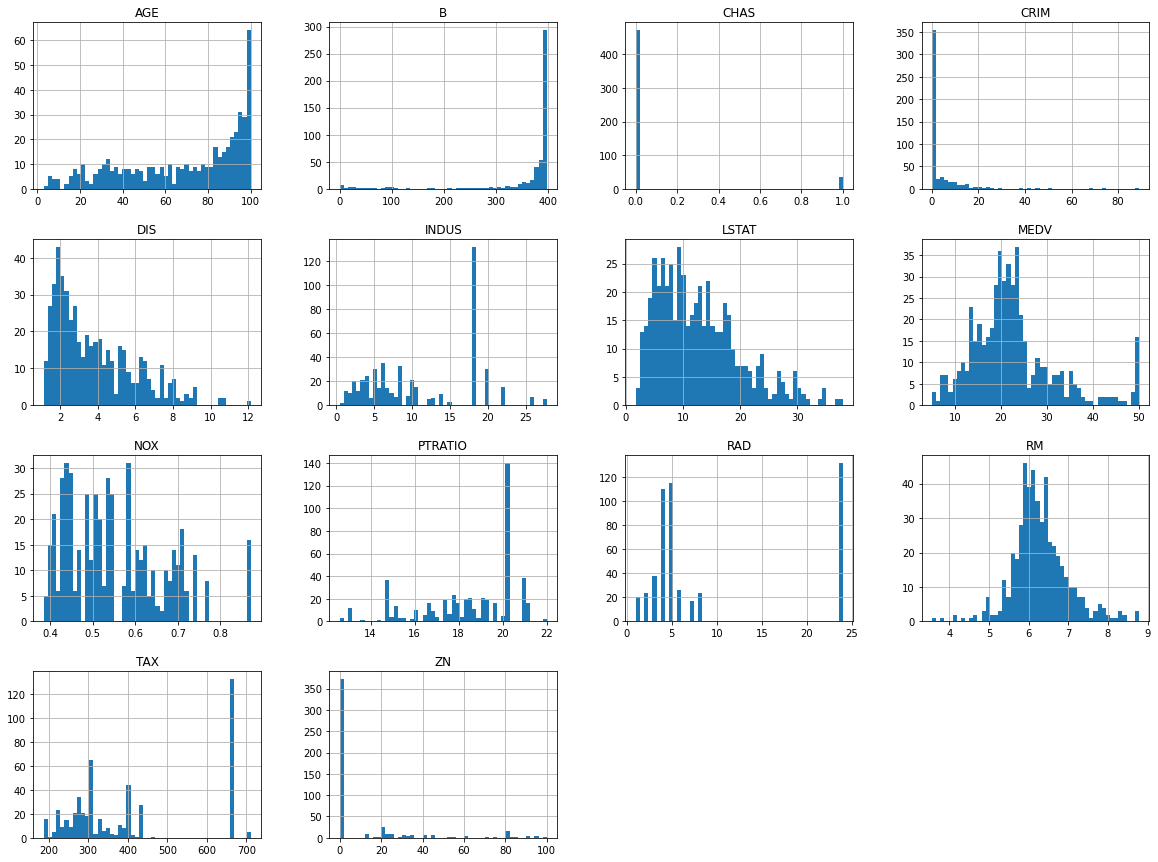

In [9]:
housing.hist(bins = 50,figsize = (20,15))

## Train - Test Splitting

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size :]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set = split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [12]:
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 405
Rows in test set : 101



In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size= 0.2,random_state = 42)
print (f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 404
Rows in test set : 102



# Stratified sampling 

## It means that the sample must consist of all the components of the population

In [14]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["CHAS"])

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [18]:
housing = strat_train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAB40F7D48>,
      dtype=object)

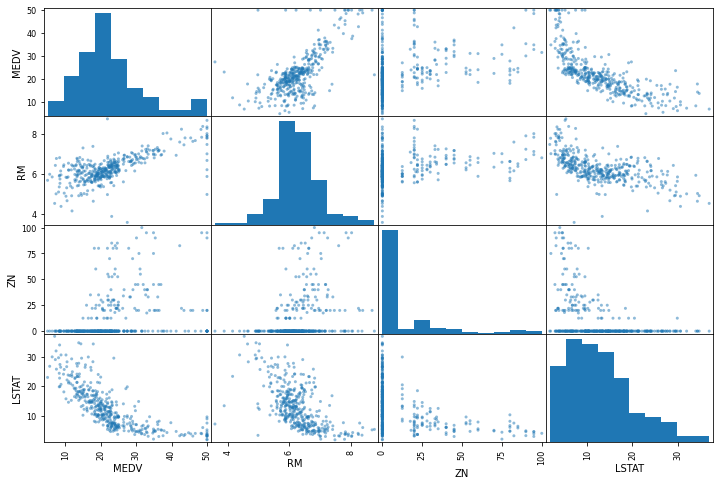

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

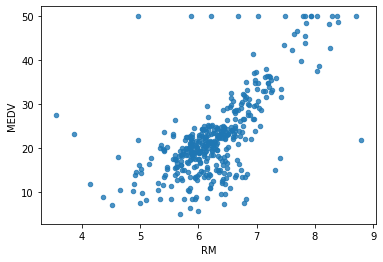

In [20]:
housing.plot(kind = "scatter",x = "RM",y = "MEDV",alpha = 0.8)

## Trying out new attributes

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


## Looking For Correlations

In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.674162
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523580
LSTAT     -0.740494
Name: MEDV, dtype: float64

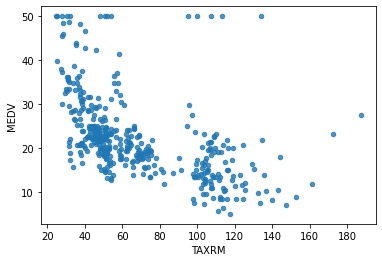

In [25]:
housing.plot(kind = 'scatter',x = 'TAXRM',y ='MEDV',alpha = 0.8)

In [26]:
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

To take care of the missing attributes,you have three options:
1. Get rid of the missing data points
2. Get rid of whole attribute
3. Set the value to some value (0,mean,median)

Here we have removed 5 data points of the RM column

In [27]:
a = housing.dropna(subset = ["RM"])  # option 1
a.shape  # (until we are not putting inplace = True till then the original housing dataframe will not change)

(399, 13)

In [28]:
housing.drop("RM",axis = 1).shape  # option 2
# Note that there is no RM column and also note that the  original housing dataframe will remain unchanged

(404, 12)

In [29]:
median = housing["RM"].median() # Compute Median for option 3
median

6.211

In [30]:
housing["RM"].fillna(median) # option 3
# until we are not putting inplace = True till then the original housing dataframe will not change

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277987,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.707966,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
# if there is some missing values in any column in the train or test dataset then it will automatically fit it with its median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing) 

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
imputer.statistics_.shape

(13,)

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X,columns = housing.columns)

In [38]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277158,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.703599,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


##  Scikit-Learn design

Primalrily three types of objects:
1. Estimators - It estimates some parameter based on a dataset. E.g. ImputerIt has a fit method and transform method.Fit method Fits the dataset and calculates internal parameters.

2. Transformers - Transform method takes input and returns output based on the learning from fit().It also has a convenience function called fit_transform() which fits and transforms.

3. Predictors - Linear Regression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.


## Feature Scaling

Primarily,Two types of Feature Scaling methods
1. Min-Max Scaling(Normalization)
    (value-min/max-min)
    sklearn provides a class called MinMaxScaler for this 
    
2. Standardization
   (value-mean)/std
   sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy = "median")),
 #   ........ add as many as you want in your pipeline
   ('std_scaler',StandardScaler()), 
])


In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr # Numpy Array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [43]:
housing_num_tr.shape

(404, 13)

## Selecting a desired Model for our Housing Prediction System

# Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5] 

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([23.98182577, 27.18589752, 20.59518637, 25.09475369, 23.73319062])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [51]:
mse

23.750621208512776

In [52]:
rmse

4.873460906636348

## Cross Validation on Linear Regression Model

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([4.20962743, 4.29674559, 5.11512792, 3.83989094, 5.65713362,
       4.40571071, 7.40858382, 5.55839649, 4.14669761, 6.01460683])

In [55]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation : ",scores.std())
    

In [56]:
print_scores(rmse_scores)

Scores :  [4.20962743 4.29674559 5.11512792 3.83989094 5.65713362 4.40571071
 7.40858382 5.55839649 4.14669761 6.01460683]
Mean :  5.065252095574847
Standard Deviation :  1.0531582834899675


# Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [58]:
# Evaluation of Model
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [59]:
mse

0.0

rmse

## Using Better Evaluation Technique - Cross Validation

K-fold Cross Validation technique divides the train dataset into K sample datasets then it trains the model on all the other samples then the sample on which it is tested, then it test on the selected sample and finds the error of that particular sample test dataset.It continues for all the sample dataset and finds all the sub errors and also we can then find the mean error and std. dev. of error.

E.g 10 Fold C.V
1 2 3 4 5 6 7 8 9 10  # 10 equally distributed data samples

test on 1
train on 2 3 4 5 6 7 8 9 10
similarly

test on 2
train on 1 3 4 5 6 7 8 9 10
and so on....

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [61]:
rmse_scores

array([3.9465638 , 5.04443668, 4.85840986, 3.97470662, 5.46026556,
       4.95809943, 6.6175902 , 4.52269278, 3.26527181, 3.5416098 ])

In [62]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation : ",scores.std())
    

In [63]:
print_scores(rmse_scores)

Scores :  [3.9465638  5.04443668 4.85840986 3.97470662 5.46026556 4.95809943
 6.6175902  4.52269278 3.26527181 3.5416098 ]
Mean :  4.618964654888904
Standard Deviation :  0.9447381388688441


# Random Forest Regressor 

In [64]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [65]:
# Evaluation of Model
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [66]:
mse

1.5039516856435604

In [67]:
rmse

1.2263570791753764

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [69]:
rmse_scores

array([2.91677572, 2.73792434, 4.47355288, 2.62396183, 4.39606312,
       2.9858528 , 4.34899886, 3.35614357, 3.17657652, 3.25958276])

In [70]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation : ",scores.std())
    

In [71]:
print_scores(rmse_scores)

Scores :  [2.91677572 2.73792434 4.47355288 2.62396183 4.39606312 2.9858528
 4.34899886 3.35614357 3.17657652 3.25958276]
Mean :  3.427543239054512
Standard Deviation :  0.6748949185303145



## Saving the Model

In [74]:
from joblib import dump,load
dump(model,'Housing Price.joblib')

['Dragon.joblib']

##  Testing the model(Random Forest Regressor) on test data

In [78]:
X_test = strat_test_set.drop("MEDV",axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.895 11.759 25.41  22.307 18.253 15.219 20.02  14.487 31.562 39.939
 19.942 11.854 24.892 25.333 19.533 10.878 31.865 14.753 23.434 18.968
 19.401 17.685 15.39  21.951 18.413 31.659 16.262 32.999  8.942 33.878
 24.353 21.533 23.878 11.058 20.563 11.281 42.11  24.6   23.823 41.797
 24.259 29.284 20.354 20.459 19.186 33.723 43.603 20.033 20.595 20.814
 20.844 14.453 21.229 15.019 24.675 33.171 43.074 28.801 19.278 20.541
 47.622  9.794 18.724 24.996 15.009 32.984 19.501 17.978 18.685 34.172
 27.786 23.21  21.186 22.603 35.085 12.672 16.001 19.553 20.772 21.153
 22.159 21.523 14.077 23.4   20.527 21.353 14.297 20.706 22.459 23.25
 18.668 27.425  7.078 26.395 19.476 30.438 19.906 31.379 14.67  26.711
 20.859 20.177] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [77]:
final_rmse

2.891103054640048

In [80]:
 prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2407168 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the Model

In [82]:
# Changing features according to the requirements and predicting the housing price
from joblib import dump,load
import numpy as np
model = load('Housing Price.joblib')
features = np.array([[-0.43942006,  7.12628155, -233.12165014, -0.27288841, -1.42262747,
       -56662407168 , -99.31238772,  2.61111401, -26.0016859 , -5778192 ,
       -0.97834,  0.41164221, -0.86091034]])
model.predict(features)


array([21.803])